In [1]:
# Import our libraries we are going to use for our data analysis.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
sns.set_style('whitegrid')
import warnings
import gc
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline
import missingno as msno  # to visualize the missing features 

In [2]:
# Read the data from csv file
df = pd.read_csv('LoanStats_2015_subset.csv', low_memory=False)

In [3]:
# save the original data for reference 
original_df = df.copy()

# Size of the data 
df.shape

# Lets see the nature of the data entries 
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,all_util,annual_inc,annual_inc_joint,application_type,avg_cur_bal,bc_open_to_buy,bc_util,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,0.0,8.0,KS,42.0,65000.0,NaN,Individual,10086.0,41055.0,17.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,VT,34.0,150000.0,NaN,Individual,61551.0,24661.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8.0,IN,50.0,75000.0,NaN,Individual,7176.0,23476.0,59.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,7.0,OH,71.0,175000.0,NaN,Individual,51015.0,21569.0,50.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,FL,91.0,44000.0,NaN,Individual,19041.0,0.0,102.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After inspecting the data, many of the columns seem to contain very little information.This little information will not effect on the prediction algorithm. Also there are many column that has empty value, NaN etc so the data prepropessing is the key here before modeling the prediction algorithm. 

Section B: 1a)> Lets check whether data in each column are missing or not. 

In [4]:
# Check both the datatypes and if there is missing values
print(f"\033[1m\033[94mData types:\n{10 * '-'}")
print(f"\033[30m{df.dtypes}\n")
print(f"\033[1m\033[94mSum of null values in each feature:\n{30 * '-'}")
print(f"\033[30m{df.isnull().sum()}")

# Function to calculate the percentage of missing value for each features 
def null_values(df):
        m_val = df.isnull().sum()
        m_val_percent = 100 * df.isnull().sum() / len(df)
        m_val_tble = pd.concat([m_val, m_val_percent], axis=1)
        m_val_tble_ren_columns = m_val_tble.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        m_val_tble_ren_columns = m_val_tble_ren_columns[
            m_val_tble_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(m_val_tble_ren_columns.shape[0]) +
              " columns that have missing values.")
        return m_val_tble_ren_columns
# Missing values statistics
miss_values = null_values(df)
miss_values.head(20)


Data types:
----------
acc_now_delinq                         float64
acc_open_past_24mths                   float64
addr_state                              object
all_util                               float64
annual_inc                             float64
                                        ...   
sec_app_open_act_il                    float64
sec_app_num_rev_accts                  float64
sec_app_chargeoff_within_12_mths       float64
sec_app_collections_12_mths_ex_med     float64
sec_app_mths_since_last_major_derog    float64
Length: 105, dtype: object

Sum of null values in each feature:
------------------------------
acc_now_delinq                              2
acc_open_past_24mths                        2
addr_state                                  2
all_util                               399725
annual_inc                                  2
                                        ...  
sec_app_open_act_il                    421097
sec_app_num_rev_accts                  4210

,Missing Values,% of Total Values
sec_app_mths_since_last_major_derog,421097,100.0
sec_app_revol_util,421097,100.0
revol_bal_joint,421097,100.0
member_id,421097,100.0
sec_app_earliest_cr_line,421097,100.0
sec_app_mort_acc,421097,100.0
sec_app_open_acc,421097,100.0
sec_app_inq_last_6mths,421097,100.0
sec_app_chargeoff_within_12_mths,421097,100.0
sec_app_open_act_il,421097,100.0


It is seen that every data feature have some missing data. Total 14 feaures are completely missing. After carefully observing the data, it look missining data is not a strucured type. 

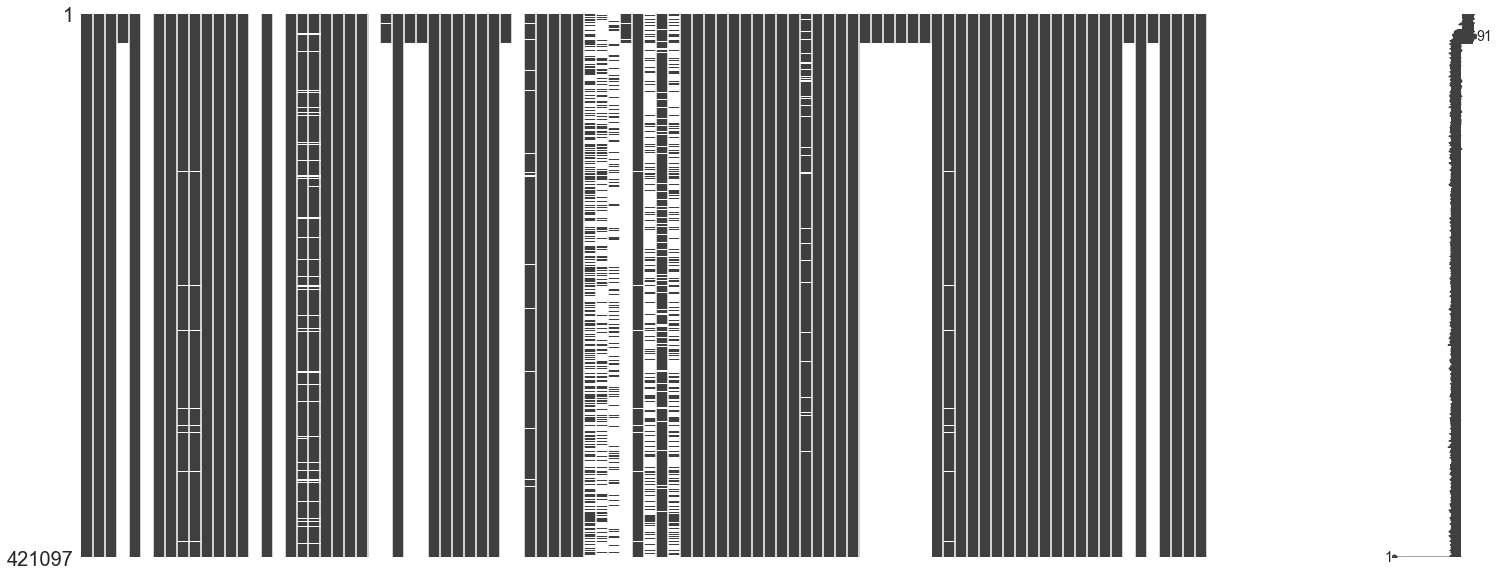

In [5]:
# Visualize the pattern of the missing data 
#sns.heatmap(df.isnull(), cbar=False)
msno.matrix(df)

As  observing the plot of missing data as shown in above, it looks missining data is not a strucured type.The missing of the data is random.There are some attributes missing more than others as well.


After a closer inspection in above plot of the missing data, many of the columns seem to contain very little information. So for further analysis, I will remove these columns to make the dataset more managable.

In [78]:
# Check the column feautures that has more than 60% of the null values as they coantain less information 
check_null = df.isnull().sum(axis=0).sort_values(ascending=False)/float(len(df))
check_null[check_null>0.60]

sec_app_mths_since_last_major_derog    1.000000
sec_app_mort_acc                       1.000000
sec_app_collections_12_mths_ex_med     1.000000
revol_bal_joint                        1.000000
sec_app_earliest_cr_line               1.000000
sec_app_inq_last_6mths                 1.000000
member_id                              1.000000
sec_app_open_acc                       1.000000
sec_app_open_act_il                    1.000000
sec_app_num_rev_accts                  1.000000
sec_app_revol_util                     1.000000
sec_app_chargeoff_within_12_mths       1.000000
id                                     0.999995
desc                                   0.999893
dti_joint                              0.998791
annual_inc_joint                       0.998787
il_util                                0.955789
mths_since_rcnt_il                     0.950581
inq_fi                                 0.949247
inq_last_12m                           0.949247
open_acc_6m                            0

In [79]:
# Remove those value that has more than 60% of null values 
df.drop(check_null[check_null>0.6].index, axis=1, inplace=True) 
df.dropna(axis=0, thresh=30, inplace=True)

In [80]:
# shape of data after removing the less informative feautures 
df.shape

(421095, 71)

In [81]:
#delete_me = ['index', 'policy_code', 'pymnt_plan', 'url', 'id', 'member_id', 'application_type', 
             #'acc_now_delinq','emp_title', 'zip_code','title']
#df.drop(delete_me , axis=1, inplace=True) 
df.head()

,acc_now_delinq,acc_open_past_24mths,addr_state,annual_inc,application_type,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,...,title,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,verification_status,zip_code
0,0.0,8.0,KS,65000.0,Individual,10086.0,41055.0,17.1,0.0,0.0,...,Debt consolidation,181540.0,291626.0,37.0,74787.0,49500.0,105910.0,73200.0,Not Verified,660xx
1,0.0,1.0,VT,150000.0,Individual,61551.0,24661.0,44.0,0.0,0.0,...,Credit card refinancing,430856.0,512381.0,18.0,44786.0,44000.0,51081.0,45500.0,Not Verified,054xx
2,0.0,8.0,IN,75000.0,Individual,7176.0,23476.0,59.9,0.0,0.0,...,Debt consolidation,193745.0,267312.0,46.0,57302.0,58500.0,31758.0,83600.0,Verified,471xx
3,0.0,7.0,OH,175000.0,Individual,51015.0,21569.0,50.3,0.0,0.0,...,Home improvement,408118.0,447599.0,23.0,152571.0,43400.0,146568.0,43400.0,Not Verified,430xx
4,0.0,1.0,FL,44000.0,Individual,19041.0,0.0,102.4,0.0,0.0,...,NaN,133285.0,139633.0,25.0,133285.0,12600.0,127033.0,12600.0,Verified,322xx


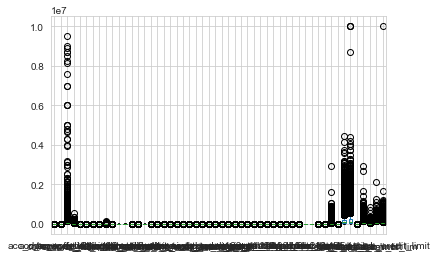

In [82]:
# To check outliers pressent in data or not using box plot. It looks the some of entries contain outliers.
# Which can be eliminated by using the method such as Z-score or Tukey's method
df.plot('avg_cur_bal', kind='box')


In [83]:
# lets check the remaining columns 
df.columns

Index(['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'annual_inc',
       'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'delinq_2yrs',
       'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership',
       'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_last_delinq', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 

Section-B:Model building 
Lets build the model. In order to build the model, we first need to select the important features.  Here are some columns we want to remove and the reason is because 

1. policy_code is always == 1 so it doesnot have any information for predictive model.
2. acc_now_delinq is almost 0. 
3. zip_code, title and add_state are neglected.It could be usefual with NLP but I neglected for this particular analysis.
4. id and member_id are all unique, which is a bit misleading. I was expecting to find payment histories, but it seems that   every record is a single customer.
5. application_type is 'INDIVIDUAL' for 99.94% of the records



In [84]:
# delete the less informative feautres 
delete_entry = ['acc_now_delinq','addr_state', 'application_type', 'emp_title', 'title', 
              'zip_code']
df.drop(delete_entry , axis=1, inplace=True) 


In [85]:
df.head()

,acc_open_past_24mths,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,...,tax_liens,term,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,verification_status
0,8.0,65000.0,10086.0,41055.0,17.1,0.0,0.0,0.0,0.0,23.84,...,0.0,60 months,181540.0,291626.0,37.0,74787.0,49500.0,105910.0,73200.0,Not Verified
1,1.0,150000.0,61551.0,24661.0,44.0,0.0,0.0,0.0,0.0,9.54,...,0.0,36 months,430856.0,512381.0,18.0,44786.0,44000.0,51081.0,45500.0,Not Verified
2,8.0,75000.0,7176.0,23476.0,59.9,0.0,0.0,0.0,0.0,31.88,...,0.0,60 months,193745.0,267312.0,46.0,57302.0,58500.0,31758.0,83600.0,Verified
3,7.0,175000.0,51015.0,21569.0,50.3,0.0,0.0,0.0,0.0,18.50,...,0.0,36 months,408118.0,447599.0,23.0,152571.0,43400.0,146568.0,43400.0,Not Verified
4,1.0,44000.0,19041.0,0.0,102.4,0.0,0.0,0.0,0.0,17.56,...,0.0,60 months,133285.0,139633.0,25.0,133285.0,12600.0,127033.0,12600.0,Verified


In [86]:
df.columns

Index(['acc_open_past_24mths', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy',
       'bc_util', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med',
       'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length',
       'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership',
       'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate',
       'issue_d', 'loan_amnt', 'loan_status', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_last_delinq', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',
       'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl',
       'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats',
       'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
       'num_tl_op_past_12m', 'open_acc', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
       'policy_code', 'pub_rec', 'pub_rec_bankruptci

Data feautures now contain 65 column. There are few column that are carry crucial information but it is formated as the string. so these should be converted into either integer or float. for example, the the column 'term' has months and column 'int_rate' has %

In [87]:
# strip months from 'term' and make it an int
df['term'] = df['term'].str.split(' ').str[1]

#interest rate is a string. Remove % and make it a float
df['int_rate'] = df['int_rate'].str.split('%').str[0]
df['int_rate'] = df.int_rate.astype(float)/100.

# extract numbers from emp_length and fill missing values with the median because median is more robust than mean. 
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(float)
df['emp_length'] = df['emp_length'].fillna(df.emp_length.median())
# Dates conversion 
col_dates = df.dtypes[df.dtypes == 'datetime64[ns]'].index
for d in col_dates:
    df[d] = df[d].dt.to_period('M')

In [88]:
df.head()

,acc_open_past_24mths,annual_inc,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,collections_12_mths_ex_med,delinq_2yrs,delinq_amnt,dti,...,tax_liens,term,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_rev_hi_lim,verification_status
0,8.0,65000.0,10086.0,41055.0,17.1,0.0,0.0,0.0,0.0,23.84,...,0.0,60,181540.0,291626.0,37.0,74787.0,49500.0,105910.0,73200.0,Not Verified
1,1.0,150000.0,61551.0,24661.0,44.0,0.0,0.0,0.0,0.0,9.54,...,0.0,36,430856.0,512381.0,18.0,44786.0,44000.0,51081.0,45500.0,Not Verified
2,8.0,75000.0,7176.0,23476.0,59.9,0.0,0.0,0.0,0.0,31.88,...,0.0,60,193745.0,267312.0,46.0,57302.0,58500.0,31758.0,83600.0,Verified
3,7.0,175000.0,51015.0,21569.0,50.3,0.0,0.0,0.0,0.0,18.50,...,0.0,36,408118.0,447599.0,23.0,152571.0,43400.0,146568.0,43400.0,Not Verified
4,1.0,44000.0,19041.0,0.0,102.4,0.0,0.0,0.0,0.0,17.56,...,0.0,60,133285.0,139633.0,25.0,133285.0,12600.0,127033.0,12600.0,Verified


The investor wants to predict the risk of charged off before lending the money to a borrower. The metrics associated to activity in the Loan Club are not known because the customer is still a prospect borrower.

In [90]:
# check for the funded_amt and funded_amnt_inv
comparison_column = np.where(df["funded_amnt"] == df["funded_amnt_inv"], True, False)
comparison_column

array([ True,  True,  True, ...,  True,  True,  True])

Features 1: Since funded_amnt and funded_amnt_inv looks same so I choose any one of them as they carry same information 

 Features 2: Now, there are few feautres that looks important but there are few numberical values so it beter ideas to make categorical featrures. The metrics delinq_2yrs is very skewed towards zero(>80% zeros). Let's make it categorical followiong features as categorical, i.e. no feature== 0 and yes when feature > 0
    a) delinq_2yrs, b)inq_last_6mnths c) pub_rec
    
Few features such as earliest_cr_line, issue_d,acc_open_past_24 mnths and few features related credit line is neglected at this time, I could not figure out, how these are related to determine the charge off so , I dropped these features here! 

In [91]:
# Make categorical of the features selected above
df['pub_rec_cat'] = 'no'
df.loc[df['pub_rec']> 0,'pub_rec_cat'] = 'yes'

df['inq_last_6mths_cat'] = 'no'
df.loc[df['inq_last_6mths']> 0,'inq_last_6mths_cat'] = 'yes'

df['delinq_2yrs_cat'] = 'no'
df.loc[df['delinq_2yrs']> 0,'delinq_2yrs_cat'] = 'yes'

In [92]:
#selected features 
features = ['loan_amnt', 'funded_amnt', 'term', 
            'installment', 'grade','emp_length',
            'home_ownership', 'annual_inc','verification_status',
            'purpose', 'dti', 'delinq_2yrs_cat', 'inq_last_6mths_cat', 
            'open_acc', 'pub_rec', 'pub_rec_cat', 'initial_list_status',  
            'loan_status'
           ]

In [93]:
# We want to distinguish between a customer who will charge off or not. So for supervised learning 
# I will divide the target class into two types: charge off and those not charge off(current,fully,late paied)

In [94]:
mask = (X_clean.loan_status == 'Charged Off')
X_clean['target'] = 0
X_clean.loc[mask,'target'] = 1

In [95]:
#We need to transform categorical variables in continuous variables using the One Hot
cat_features = ['term',, 'home_ownership', 'grade', 'verification_status', 'purpose',, 'initial_list_status',
                'delinq_2yrs_cat','inq_last_6mths_cat', 'pub_rec_cat']

# Drop any residual missing value
X_clean.dropna(axis=0, how = 'any', inplace = True)

# Prepare the features and target variable for predictive model
X = pd.get_dummies(X_clean[X_clean.columns[:-2]], columns=cat_features).astype(float)
y = X_clean['target']

In [101]:
# Import library for logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import preprocessing

In [104]:
#Normalize the range of independent features
X_scaled = preprocessing.scale(X)
print(X_scaled.shape)

[[-0.33353012 -0.33353012 -0.75058624 ... -0.48380685 -0.81958162
   0.81958162]
 [ 1.77447128  1.77447128  2.42980841 ... -0.48380685 -0.81958162
   0.81958162]
 [ 2.19607156  2.19607156  2.61013924 ... -0.48380685 -0.81958162
   0.81958162]
 ...
 [-0.33353012 -0.33353012 -0.49508433 ... -0.48380685 -0.81958162
   0.81958162]
 [-0.21641893 -0.21641893 -0.50222259 ...  2.06694057 -0.81958162
   0.81958162]
 [ 0.60335939  0.60335939  0.8860696  ...  2.06694057  1.22013473
  -1.22013473]]
   
(269380, 45)


In [105]:
# Function that tran the logistic regression model, analyse and report along with confusio matrix  

def run_models(X_train, y_train, X_test, y_test):
    
    clfs = {'LogisticRegression' : LogisticRegression()}
    cols = ['model', 'roc_auc_score', 'precision_score', 'recall_score','f1_score']

    models_report = pd.DataFrame(columns = cols)
    conf_matrix = dict()

    for clf, clf_name in zip(clfs.values(), clfs.keys()):

        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_score = clf.predict_proba(X_test)[:,1]
        
        #Performance parameter for the prediction model
        tmp = pd.Series({
                         'model': clf_name,
                         'roc_auc_score' : metrics.roc_auc_score(y_test, y_score),
                         'precision_score': metrics.precision_score(y_test, y_pred),
                         'recall_score': metrics.recall_score(y_test, y_pred),
                         'f1_score': metrics.f1_score(y_test, y_pred)})

        models_report = models_report.append(tmp, ignore_index = True)
        conf_matrix[clf_name] = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)

        plt.figure(1, figsize=(6,6))
        plt.xlabel('false positive rate')
        plt.ylabel('true positive rate')
        plt.title('ROC curve')
        plt.plot(fpr, tpr, label = clf_name )
        plt.legend(loc=2, prop={'size':11})
   
    
    return models_report, conf_matrix

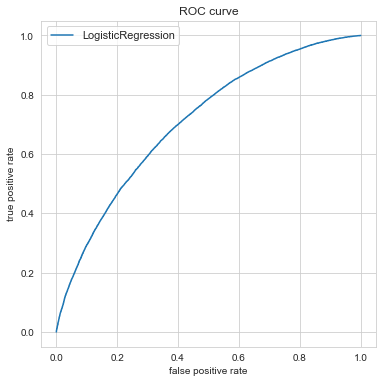

In [113]:
#Train the logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size=0.3, random_state=0)
#Performance of the model 
models_report, conf_matrix = run_models(X_train, y_train, X_test, y_test)

In [114]:
# Detailed report 
models_report

,model,roc_auc_score,precision_score,recall_score,f1_score
0,LogisticRegression,0.708454,0.56164,0.111094,0.185496


In [115]:
# Confusion matrix to analyze the performance 
conf_matrix['LogisticRegression']

Predicted,0,1
True,,
0,60047,1657
1,16987,2123


Lets try to explore the possible ways to improve the performance. I have doubt there are class imbalance. 

In [116]:
# check for class imblance for further analysis 
loan_status_grouped = df.groupby('loan_status').size().sort_values(ascending=False)/len(df) * 100
loan_status_grouped

loan_status
Fully Paid            46.738622
Current               36.028212
Charged Off           15.161662
Late (31-120 days)     1.164820
In Grace Period        0.654722
Late (16-30 days)      0.249825
Default                0.002137
dtype: float64

Here our model is of two types of imbalance target class. charge off is about 15% and not charge off is about 85%. The performance could be improved further if we oversampled for minority class and undersample the majority class. With this trick, the performance of the model may improve.